<a href="https://colab.research.google.com/github/heidilyu/Advanced-Calculus-/blob/main/Lab_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1.3

Goals:
* Compute arithmetic expressions.
* Define and use functions.
* Graph functions.
* Implement Newton's method.
* Determine which properties of a function affect the speed of Newton's method.

### Instructions
* With your group, work through each of the questions below.  Most questions include some discussion and some bullet-pointed instructions.  Make sure you carry out the bullet-pointed instructions, because that it what is graded.  
* You are expected to collaborate with your group.  You should arrive at the answers to these questions together.  However, your submitted answers should be expressed in your own words.
* If you need to pause, you can save and come back to your work later.  
* When you are done, select "download .ipynb" from the file menu.  Save the ipynb to your computer, then upload it to the Lab assignment in gradescope.


We will begin by importing the libraries we use for graphing.

In [41]:
import matplotlib.pyplot as plt
import numpy as np

Define five algebraic functions by running this cell.  Each person in your group should pick a different one of these functions.  For the rest of the lab, "your function" refers to the function you picked.

In [42]:
def f1(x):
  return x**3 - 4*x**2 + 6*x - 2.5

def f2(x):
  return x**3 - 6*x**2 + 14*x - 10.5

def f3(x):
  return x**3 - 10*x**2 + 30*x - 26.5

def f4(x):
  return x**3 - 5*x**2 + 10*x - 6.5

def f5(x):
  return x**3 - 8*x**2 + 22*x - 18.5

Hao chose f1(x)

Your function has a root (x-intercept) near $x=2$, but it would be difficult to compute exactly.  Here's an idea.  We can make the linearization $L(x)$ of your function at $a=2$, and solve for the point where $L(x)=0$.  It won't be exactly the root of your function, but it should be a closer guess than $2$.

### Q1

* In a code cell below this, define a function `l(x)` which is the linearization of your function at $a=2$.  You can compute the derivative and value you need by hand, with a calculator, or in a code cell.
* Create a graph using $x$ values near $2$ that contains your function and its linearization.  
* You can restrict the height of the graph so that you can see the details better by calling `plt.ylim((-5,5))` before you call `plt.show()`.

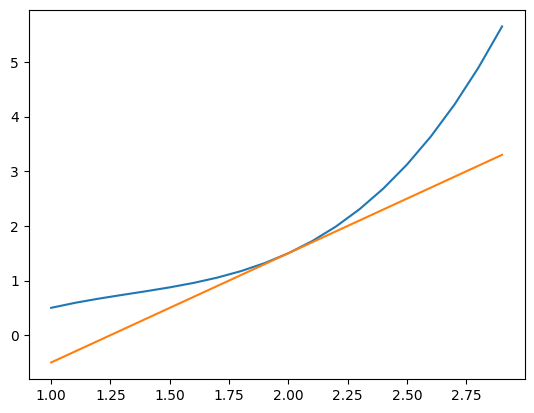

In [43]:
def f1(x):
  return x**3 - 4*x**2 + 6*x - 2.5

def f_prime(x):
  return 3*x**2 - 8*x + 6

a = 2
f_a = f1(a)
f_prime_a = f_prime(a)

def l(x):
  return f_a + f_prime_a *(x-a)

x=np.arange(1,3,0.1)

plt.plot(x, f1(x))
plt.plot(x, l(x))


### Q2
Now we'll apply Newton's Method to your function.  You already have a function, but you need a derivative.  
* Define a new function `df(x)` that returns the derivative of your function at `x`.
* Copy your definition of `new(a)` from the prelab.
* Modify `new(a)` to use your function, intead of `f` to compute the value it returns (or redefine `f` to be your function, either will work).
* Test your code by running `new(2)`.  The result should be the $x$-intercept of the linearization you graphed in Q1.


In [45]:
def df(a):
  return 3*a**2 - 8*a + 6

def new(a):
  return a - f1(a)/df(a)

first_guess = new(2)
second_guess = new(first_guess)

print(new(2))

1.25


### Q3

We are now ready to repeatedly apply the `new()` function to get a very good approximation of the $x$-intercept of your function.  However, it is no fun to just spit out the answer.  Let's make it show us its steps.
* Modify your definition of `new()`:
 * Instead of returning its output immediately, first save it to a variable `x`
 * Then print `x`
 * Then return `x`.
* Apply your modified `new()` function 10 times to the intial guess $a=2$. It should print out 10 approximations before returning its final answer.

You should notice that the last few approximations are remarkably close together.  That's because the approximations are so accurate that they cannot be improved upon much.

In [20]:
a = 2

for i in range(10):
  a = new(a)
  print(a)


1.25
0.2272727272727273
0.5342370825934427
0.6441139040541561
0.6573162008805215
0.6574919378860324
0.6574919686319243
0.6574919686319252
0.6574919686319252
0.6574919686319252


###Q4

We should assume that the final outcome of applying the `new` function 10 times is close enough to the actual root of your function.  Now the question is, how quickly did Newton's method get you close to that actual root?  To answer this you'll want to know the error in each approximation.

* Copy the line in which you apply `new()` 10 times into a new code cell.  Instead of just printing the output, assign it to a variable called `actual`.
* Modify your `new` function again.  This time, instead of printing the value of `x`, have it print difference between `x` and `actual` before returning `x`.
* Apply the `new` function 10 times again to the intial guess $a=2$.  Look at the list of errors printed.  What do you notice?

It may help you make sense of what you saw to know that python displays small numbers in scientific notation.  Furthermore, numbers in python are by default only stored to 32 decimal places.


In [32]:
a = 2

for i in range(10):
  a = new(a)

actual = a

def new(a):
  x = a - f1(a)/df(a)
  error = x - actual
  print("error =:", error)
  return x

a = 2
for i in range(10):
  a = new(a)


error =: 0.5925080313680748


TypeError: unsupported operand type(s) for ** or pow(): 'NoneType' and 'int'

###Q5

This is our main question:  

> What properties of a function make Newton's method more or less efficient at finding a root?

The method worked for everyone's function eventually, but some coverged more quickly than others.  They got closer to the actual value in fewer steps.  The purpose of this question is to systematically generate and compare data and to try to draw conclusions from that data.  Confer with your group and agree on an apporach to the following questions.  Report your decisions and findings in a combination of text and code cells.

* How are you going to measure how quickly the method is converging?
* Is everyone's root the same distance from their starting guess?  In order to get comparable data how can you control for the discrepancies here?
* Generate and share the data about your respective functions.  Explain how quickly each person's function converges according the the measure you chose.
* Make a conjecture about what underlying property of the functions or their graphs caused some to converge faster than others.  
* For full credit, propose a reasonable mathematical explanation for why this property would have that effect.



which one is the fastest in convergence to the root?
which one is the slowest?

what made it converge slaw

1. f2(x) converges the fastest, when the slope is the steepest

2. f'a is small, moving l

3. f'' is small, then f' is small,


